In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'datetime' : ['Date', 'Time']}, infer_datetime_format=True, 
                 na_values=['nan','?'], index_col='datetime')
data.dropna()

data['occupation'] = (data.Global_active_power > 0.5).astype(int)

print(data.shape)
print(list(data.columns))

(2075259, 8)
['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'occupation']


In [19]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,occupation
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,1
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,1
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,1
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,1
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,1


In [16]:
for j in range(0,7):        
        data.iloc[:,j] = data.iloc[:,j].fillna(data.iloc[:,j].mean())

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
occupation               int32
dtypes: float64(7), int32(1)
memory usage: 134.6 MB


In [20]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,occupation
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,5.258389e-01
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,4.993320e-01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.000000e+00
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.000000e+00


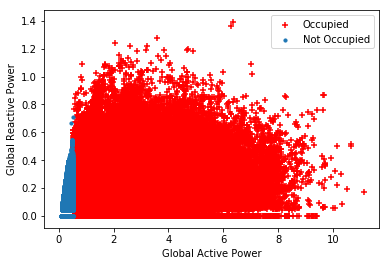

In [43]:
import matplotlib.pylab as plt

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

pos , neg = (y==1).reshape(2075259,1) , (y==0).reshape(2075259,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1], c="r", marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1], marker="o", s=10)
plt.xlabel("Global Active Power")
plt.ylabel("Global Reactive Power")
plt.legend(["Occupied","Not Occupied"], loc=0)

In [44]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [49]:
from scipy import special as ss

def cost_function(w, X, y, ld):
    w.resize((w.shape[0],1))
    y.resize((y.shape[0],1))
    
    n = len(y)
    f = ss.log1p(1 + np.nan_to_num(ss.expm1(-y * np.dot(X, w))))
    cost = np.float(1/n * np.sum(f) + ld * (np.dot(np.transpose(w), w)))
    
    # compute gradient
    predictions = sigmoid(X @ w)
    j_0= 1/n * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/n * (X.transpose() @ (predictions - y))[1:] + (ld/n)* w[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    
    return cost, grad

In [50]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

initial_w = np.zeros((X.shape[1], 1))
ld = 1
cost = cost_function(initial_w, X, y, ld)

print("Cost at initial w (zeros):", cost)

Cost at initial w (zeros): (0.6931471805599466, array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]]))


In [51]:
def gradientDescent(X,y,w,alpha,num_iters,ld):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = cost_function(w,X,y,ld)
        w = w - (alpha * grad)
        J_history.append(cost)
    
    return w , J_history

w , J_history = gradientDescent(X,y,initial_w,1,800,0.2)
print("Logistic Ridge Regression:\n", w)

Logistic Ridge Regression:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
